# Time Series Analysis
Objective: Analyze trends over time (e.g., how ratings change over months or years)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading of "batch1_restaurants_dataset" dataset: 🍽️


In [2]:
# Restuurant Dataset
batch_resturant_review_dataset = pd.read_csv("../data/batch1_restaurants_dataset.csv")

In [3]:
batch_resturant_review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_id       1356 non-null   object 
 1   name           1356 non-null   object 
 2   reviews        1356 non-null   int64  
 3   main_category  1334 non-null   object 
 4   categories     1334 non-null   object 
 5   main_rating    1356 non-null   float64
 6   address        1325 non-null   object 
 7   link           1356 non-null   object 
 8   review_photos  1356 non-null   object 
 9   Unnamed: 9     0 non-null      float64
 10  Unnamed: 10    0 non-null      float64
 11  Unnamed: 11    0 non-null      float64
 12  Unnamed: 12    0 non-null      float64
 13  Unnamed: 13    0 non-null      float64
 14  Unnamed: 14    0 non-null      float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(9), int64(1), object(7)
memory usage: 180

In [4]:
resturant_review_analysis = batch_resturant_review_dataset.copy()
resturant_review_analysis = resturant_review_analysis[['place_id','name','reviews','main_category','categories','main_rating','address']] #Remove 'link' & 'review_photos', no use for data analysis

In [5]:
# Sample of 'targeted' analysis
resturant_review_analysis.head(3)

,place_id,name,reviews,main_category,categories,main_rating,address
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145"
1,ChIJuXEcL-gX2jEReUwbpfL8C4c,#01-22 Wufu Hakka Noodle,1,Noodle shop,['Noodle shop'],5.0,"590 Upper Thomson Rd, #01-22, Singapore 574419"
2,ChIJebVvXAAZ2jERRlzs4R2Qsm4,116 PHỐ ĐÊM,3,Vietnamese restaurant,['Vietnamese restaurant'],5.0,"116 Mackenzie Rd, Singapore 228710"


In [6]:
resturant_review_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_id       1356 non-null   object 
 1   name           1356 non-null   object 
 2   reviews        1356 non-null   int64  
 3   main_category  1334 non-null   object 
 4   categories     1334 non-null   object 
 5   main_rating    1356 non-null   float64
 6   address        1325 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 74.3+ KB


In [7]:
resturant_review_analysis.isna().sum()

place_id          0
name              0
reviews           0
main_category    22
categories       22
main_rating       0
address          31
dtype: int64

In [8]:
resturant_review_analysis['main_category'] = resturant_review_analysis['main_category'].fillna('Unknown')
resturant_review_analysis['categories'] = resturant_review_analysis['categories'].fillna('[Unknown]')
resturant_review_analysis['address'] = resturant_review_analysis['address'].fillna('Singapore')

In [9]:
resturant_review_analysis.isna().sum()

place_id         0
name             0
reviews          0
main_category    0
categories       0
main_rating      0
address          0
dtype: int64

In [10]:
resturant_review_analysis = resturant_review_analysis.drop_duplicates()
resturant_review_analysis = resturant_review_analysis.drop_duplicates(subset=['place_id', 'name','reviews','address'])

Review for resturant is ready to analysis. Columns:
1. place_id: Default
2. name
3. reviews
4. main_category
5. categories
6. main_rating
7. address


In [11]:
resturant_review_analysis

,place_id,name,reviews,main_category,categories,main_rating,address
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145"
1,ChIJuXEcL-gX2jEReUwbpfL8C4c,#01-22 Wufu Hakka Noodle,1,Noodle shop,['Noodle shop'],5.0,"590 Upper Thomson Rd, #01-22, Singapore 574419"
2,ChIJebVvXAAZ2jERRlzs4R2Qsm4,116 PHỐ ĐÊM,3,Vietnamese restaurant,['Vietnamese restaurant'],5.0,"116 Mackenzie Rd, Singapore 228710"
3,ChIJLSQEyKwZ2jERsJYlxkDMr1g,123 ZÔ - Ẩm Thực Việt,252,Restaurant,['Restaurant'],4.4,"12 Gopeng St, #01-45, 49-51 icon village, Sing..."
4,ChIJLTGN8D4Z2jERP4VNFXTnIpQ,123 Zô The Việt Kitchen,19,Vietnamese restaurant,['Vietnamese restaurant'],3.7,"18 Raffles Quay, #01-48 Lau Pa Sat, Singapore ..."
...,...,...,...,...,...,...,...
1349,ChIJ0eEWGp8Z2jERU0GVV6u922I,Dutch Colony Coffee Co.,382,Coffee shop,['Coffee shop'],4.2,"81 Clemenceau Ave, #01-21, Singapore 239917"
1350,ChIJs7H4tnUZ2jERCdc5MTamRBk,Colony Logistics (S) Pte. Ltd.,0,Freight forwarding service,['Freight forwarding service'],0.0,"151 Chin Swee Rd, Singapore 169876"
1351,ChIJD1OQF_YX2jERS2ErVUoYUEQ,The Colony Solutions,0,Computer support and services,['Computer support and services'],0.0,"Excalibur Centre #04-11, 71 Ubi Cres, 408571"
1353,ChIJOdu7DbUZ2jERU4wDCM5Mhe8,The Honey Colony,9,Gourmet grocery store,['Gourmet grocery store'],3.9,"131 Tanglin Rd, #02-19, Singapore 247924"


In [12]:
cats_to_remove = ['Advertising agency', 'Art museum', 'Art studio', 'Association / Organization', 'Beauty salon',
                  'Bicycle club', 'Branding agency', 'Business management consultant', 'Car dealer', 'Car wash', 'Caterer',
                  'Catering food and drink supplier', "Children's clothing store", 'Chinese Takeaway', 'Chinese language school', 'Clothing store',
                  'Coaching center', 'Coffee store', 'Condominium complex', 'Consultant', 'Corporate office', 'Curtain and upholstery cleaning service',
                  'Dance school', 'Delivery Restaurant', 'Designer Clothing Shop', 'Diving center', 'E-commerce service', 'Education center',
                  'Event management company', 'Fish store', 'Food producer', 'Food products supplier', 'Freight forwarding service', 'Fruit wholesaler'
                  'Gift shop', 'Gourmet grocery store', 'Gym and Fitness Centre', 'Hawker Stall', 'Hawker center', 'Health and beauty shop',
                  'Health food store', 'Holding company', 'Hotel', 'Housing development', 'Importer', 'Industrial Real Estate Agency', 'Industrial equipment supplier',
                  'Information services', 'Interior designer', 'Italian grocery store', 'Japanese confectionery shop', 'Jewelry store', 'Lodging',
                  'Marketing agency', 'Marketing consultant', 'Maternity store', 'Motorcycle rental agency', 'Movie rental store', 'Music producer',
                  'Pastry shop', 'Performing arts group', 'Pet Shop', 'Photography service', 'Property management company', 'Publisher', 'Real estate consultant',
                  'Recording studio', 'Religious organization', 'Restaurant supply store', 'Serviced accommodation', 'Takeaways', 'Tattoo and piercing shop',
                  'Tattoo shop', 'Tea store', 'Used clothing store', 'Video production service', 'Wellness center', 'Wellness program', 'Wine cellar', "Women's clothing store","Candle Store"]

cats_to_remove = [cat.lower() for cat in cats_to_remove]
mask = resturant_review_analysis['main_category'].str.lower().isin(cats_to_remove)
resturant_review_analysis = resturant_review_analysis[~mask]

In [13]:
resturant_review_analysis

,place_id,name,reviews,main_category,categories,main_rating,address
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145"
1,ChIJuXEcL-gX2jEReUwbpfL8C4c,#01-22 Wufu Hakka Noodle,1,Noodle shop,['Noodle shop'],5.0,"590 Upper Thomson Rd, #01-22, Singapore 574419"
2,ChIJebVvXAAZ2jERRlzs4R2Qsm4,116 PHỐ ĐÊM,3,Vietnamese restaurant,['Vietnamese restaurant'],5.0,"116 Mackenzie Rd, Singapore 228710"
3,ChIJLSQEyKwZ2jERsJYlxkDMr1g,123 ZÔ - Ẩm Thực Việt,252,Restaurant,['Restaurant'],4.4,"12 Gopeng St, #01-45, 49-51 icon village, Sing..."
4,ChIJLTGN8D4Z2jERP4VNFXTnIpQ,123 Zô The Việt Kitchen,19,Vietnamese restaurant,['Vietnamese restaurant'],3.7,"18 Raffles Quay, #01-48 Lau Pa Sat, Singapore ..."
...,...,...,...,...,...,...,...
1346,ChIJ9wXcrqkZ2jER2uM7Iul1CO4,Colony Bakery,35,Bakery,['Bakery'],4.1,"7 Raffles Ave., Singapore 039799"
1348,ChIJKdihA68Z2jER07IZ_I3hEVI,Colony Capital Asia Pacific Pte Ltd,0,Unknown,[Unknown],0.0,Singapore
1349,ChIJ0eEWGp8Z2jERU0GVV6u922I,Dutch Colony Coffee Co.,382,Coffee shop,['Coffee shop'],4.2,"81 Clemenceau Ave, #01-21, Singapore 239917"
1351,ChIJD1OQF_YX2jERS2ErVUoYUEQ,The Colony Solutions,0,Computer support and services,['Computer support and services'],0.0,"Excalibur Centre #04-11, 71 Ubi Cres, 408571"


---

## Loading of "batch1_reviews_dataset" dataset 🗣️: 

In [14]:
# Batch 1 of Reviews Dataset
batch_review_dataset = pd.read_csv("../data/batch1_reviews_dataset.csv")

In [15]:
# Raw Data
batch_review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563796 entries, 0 to 563795
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   place_id                             563796 non-null  object 
 1   name                                 563796 non-null  object 
 2   review_id                            563796 non-null  object 
 3   rating                               563796 non-null  int64  
 4   review_text                          381540 non-null  object 
 5   published_at                         563796 non-null  object 
 6   published_at_date                    563794 non-null  object 
 7   review_likes_count                   563796 non-null  int64  
 8   response_from_owner_text             119998 non-null  object 
 9   response_from_owner_ago              120824 non-null  object 
 10  response_from_owner_date             120824 non-null  object 
 11  total_number_

In [16]:
batch_review_dataset[:5]

,place_id,name,review_id,rating,review_text,published_at,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
0,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUM3bE9DZ2lRRRAB,5,Delicious delicious delicious! Had the Tom yum...,2 weeks ago,2024-08-15 00:17:31.766742,0,NaN,NaN,NaN,453.0,1210.0,True,NaN,NaN
1,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSURicHQyb2Z3EAE,4,Fairly authentic Pad Thai cooked by a Thai per...,3 weeks ago,2024-08-08 00:17:31.769063,0,NaN,NaN,NaN,1381.0,8425.0,True,NaN,NaN
2,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSURieXYtTGdnRRAB,5,I had the fried kway tiao which cost $6. If ha...,3 weeks ago,2024-08-08 00:17:31.771272,0,NaN,NaN,NaN,615.0,2361.0,True,NaN,NaN
3,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUNiOFlhSzl3RRAB,3,I got the prawn omelette rice here for $6. The...,a month ago,2024-07-29 00:17:31.773506,0,NaN,NaN,NaN,29.0,40.0,False,NaN,NaN
4,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSUN6NnJhZEp3EAE,5,Really tasty Thai place in chinatown! The gree...,2 months ago,2024-06-29 00:17:31.775457,0,NaN,NaN,NaN,38.0,12.0,False,NaN,NaN


In [17]:
batch_review_dataset['place_id'].duplicated().sum()

562768

In [18]:
batch_review_dataset['published_at_date'].isnull().sum()

2

In [19]:
combine_dataframe = pd.merge(left=resturant_review_analysis, right=batch_review_dataset, on='place_id')
combine_dataframe = combine_dataframe.rename(columns={'name_x':'name'}).drop(columns='name_y')
combine_dataframe.reset_index()
combine_dataframe[:2]

,place_id,name,reviews,main_category,categories,main_rating,address,review_id,rating,review_text,...,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",ChZDSUhNMG9nS0VJQ0FnSUNiN19fZ0RBEAE,5,Deserve a Michelin recognize food was memorizi...,...,2024-08-07 16:56:41.667109,0,NaN,NaN,NaN,8.0,103.0,True,NaN,NaN
1,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",ChZDSUhNMG9nS0VJQ0FnSUQ5d1AtTEp3EAE,1,NaN,...,2024-06-28 16:56:41.669325,0,NaN,NaN,NaN,10.0,NaN,True,NaN,NaN


In [20]:
combine_dataframe = combine_dataframe.dropna(subset='published_at_date')

In [21]:
combine_dataframe['published_at_date'] = pd.to_datetime(combine_dataframe['published_at_date'])
combine_dataframe['published_at_date_monthyear'] = combine_dataframe['published_at_date'].dt.to_period('M')
combine_dataframe['published_at_date_year'] = combine_dataframe['published_at_date'].dt.year.astype('Int64')

In [22]:
combine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541760 entries, 0 to 541761
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   place_id                             541760 non-null  object        
 1   name                                 541760 non-null  object        
 2   reviews                              541760 non-null  int64         
 3   main_category                        541760 non-null  object        
 4   categories                           541760 non-null  object        
 5   main_rating                          541760 non-null  float64       
 6   address                              541760 non-null  object        
 7   review_id                            541760 non-null  object        
 8   rating                               541760 non-null  int64         
 9   review_text                          368992 non-null  object        
 

In [23]:
combine_dataframe['review_text'].fillna('-',inplace=True)
combine_dataframe.isna().sum()

place_id                                    0
name                                        0
reviews                                     0
main_category                               0
categories                                  0
main_rating                                 0
address                                     0
review_id                                   0
rating                                      0
review_text                                 0
published_at                                0
published_at_date                           0
review_likes_count                          0
response_from_owner_text               424688
response_from_owner_ago                423862
response_from_owner_date               423862
total_number_of_reviews_by_reviewer     20959
total_number_of_photos_by_reviewer     173736
is_local_guide                          20474
review_translated_text                 523644
response_from_owner_translated_text    540559
published_at_date_monthyear       

In [24]:
combine_dataframe

,place_id,name,reviews,main_category,categories,main_rating,address,review_id,rating,review_text,...,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text,published_at_date_monthyear,published_at_date_year
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",ChZDSUhNMG9nS0VJQ0FnSUNiN19fZ0RBEAE,5,Deserve a Michelin recognize food was memorizi...,...,NaN,NaN,NaN,8.0,103.0,True,NaN,NaN,2024-08,2024
1,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",ChZDSUhNMG9nS0VJQ0FnSUQ5d1AtTEp3EAE,1,-,...,NaN,NaN,NaN,10.0,NaN,True,NaN,NaN,2024-06,2024
2,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",ChZDSUhNMG9nS0VJQ0FnSUNUeHF1NFN3EAE,3,Ok. Decent food. A little ex.,...,NaN,NaN,NaN,196.0,1583.0,True,NaN,NaN,2024-05,2024
3,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",ChZDSUhNMG9nS0VJQ0FnSURqeEpmOFhnEAE,5,Here to celebrate my birthday. The food is so ...,...,NaN,NaN,NaN,11.0,1.0,False,NaN,NaN,2024-05,2024
4,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",ChdDSUhNMG9nS0VJQ0FnSUM5NjhtNGlnRRAB,1,This is not the first time I have missing food.,...,NaN,NaN,NaN,6.0,NaN,True,NaN,NaN,2024-03,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541757,ChIJF3ZI5goY2jERbAEUpy98dwA,Comida Mexicana Singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",ChdDSUhNMG9nS0VJQ0FnSUN3X2V5UG5nRRAB,3,So so food. The fajita meats are served on a h...,...,NaN,NaN,NaN,224.0,180.0,True,NaN,NaN,2016-08,2016
541758,ChIJF3ZI5goY2jERbAEUpy98dwA,Comida Mexicana Singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",ChZDSUhNMG9nS0VJQ0FnSUN3c3ZLR1RREAE,4,slightly pricy but food is good. the Nacho pla...,...,NaN,NaN,NaN,306.0,285.0,True,NaN,NaN,2016-08,2016
541759,ChIJF3ZI5goY2jERbAEUpy98dwA,Comida Mexicana Singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",ChdDSUhNMG9nS0VJQ0FnSUNnNE9uSDl3RRAB,1,More than half the restaurant was open but app...,...,NaN,NaN,NaN,1013.0,2851.0,True,NaN,NaN,2015-08,2015
541760,ChIJF3ZI5goY2jERbAEUpy98dwA,Comida Mexicana Singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",ChZDSUhNMG9nS0VJQ0FnSUN3b3FEUlRREAE,5,Authentic Mexican cuisine in my opinion. Quite...,...,NaN,NaN,NaN,650.0,318.0,True,NaN,NaN,2013-08,2013


---

## **Data Analysis Part 1**: <font color="red">'main_category'</font>, according to years

In [32]:
# Raw Data into analysis
time_series_year_analyze_bycat = combine_dataframe[combine_dataframe['published_at_date_year'] > 2014]
time_series_year_analyze_bycat = time_series_year_analyze_bycat.groupby(['main_category','published_at_date_year'])['rating'].mean().unstack()
time_series_year_analyze_bycat

published_at_date_year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
main_category,,,,,,,,,,
Argentinian restaurant,4.000000,4.076923,4.090909,4.328125,4.366667,4.441176,4.308943,4.180000,4.704890,4.750000
Art cafe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.945946,NaN
Asian fusion restaurant,NaN,1.000000,4.185185,4.223404,4.300699,3.976744,4.027972,4.045833,4.267442,4.160494
Asian restaurant,4.000000,3.500000,4.017857,4.275000,4.092527,4.283105,4.324176,4.015385,4.331522,4.671111
Authentic Japanese restaurant,NaN,4.444444,4.483871,4.551020,4.302083,4.358209,4.593023,4.338028,4.505495,4.794872
...,...,...,...,...,...,...,...,...,...,...
Vietnamese restaurant,4.151515,4.178808,4.153348,4.163669,4.143252,4.251592,4.298365,4.354389,4.408138,4.510225
Western restaurant,NaN,NaN,NaN,5.000000,4.003295,4.293763,4.226328,4.093541,4.422846,4.232687
Wine bar,NaN,NaN,NaN,4.700000,4.461538,4.681818,4.150000,4.290323,4.533333,4.580645


In [33]:
time_series_year_analyze_bycat = time_series_year_analyze_bycat.dropna(thresh = len(time_series_year_analyze_bycat.columns) - 3)
time_series_year_analyze_bycat.shape

(80, 10)

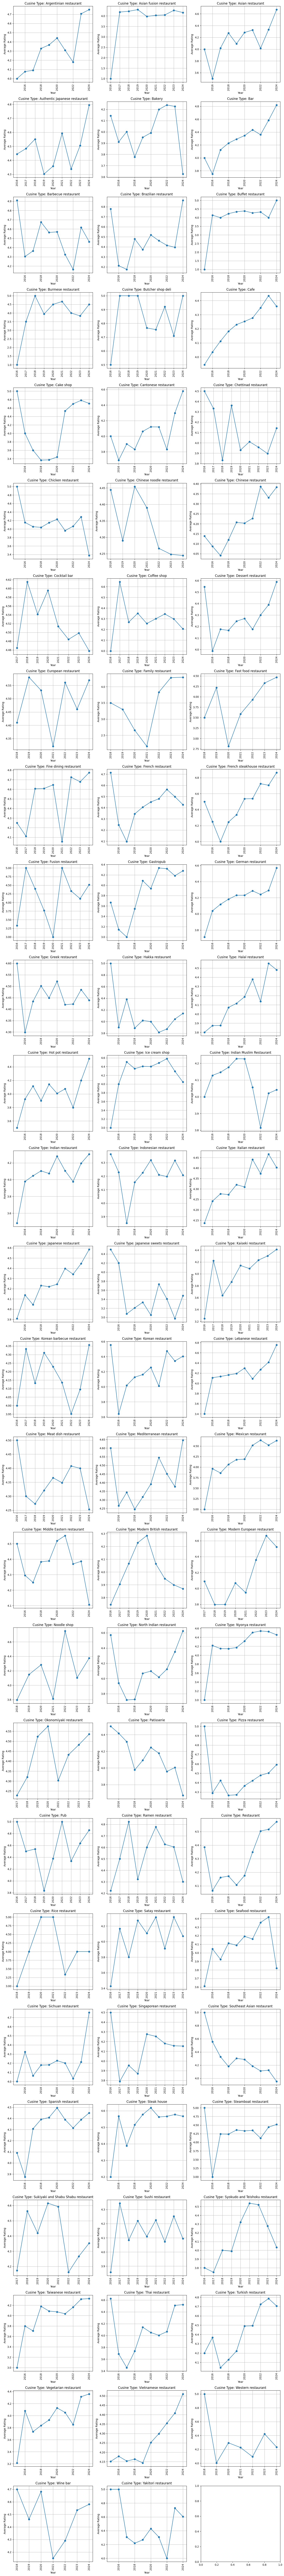

In [34]:
num_cols = 3
num_rows = int(np.ceil(len(time_series_year_analyze_bycat.index) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for ax, (category, data) in zip(axes, time_series_year_analyze_bycat.iterrows()):
    ax.plot(time_series_year_analyze_bycat.columns, data, marker='o', label=category)
    ax.set_title(f'Cusine Type: {category}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Rating')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## **Data Analysis Part 2**: <font color="red">'main_category'</font>, according to highest sales by months


In [28]:
time_series_max_month = combine_dataframe[['main_category','published_at_date_monthyear']]
time_series_max_month_analyze = combine_dataframe.groupby(['main_category','published_at_date_monthyear'])['rating'].mean().reset_index()
time_series_max_month_analyze.shape

(1964, 3)

In [29]:
time_series_max_month_analyze.unstack()

main_category  0       Argentinian restaurant
               1       Argentinian restaurant
               2       Argentinian restaurant
               3       Argentinian restaurant
               4       Argentinian restaurant
                                ...          
rating         1959                  4.777778
               1960                       4.0
               1961                       5.0
               1962                      4.45
               1963                  4.833333
Length: 5892, dtype: object

In [30]:
# num_cols = 3
# num_rows = int(np.ceil(len(time_series_year_analyze_bycat.index) / num_cols))

# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
# axes = axes.flatten()

# for ax, (category, data) in zip(axes, time_series_year_analyze_bycat.iterrows()):
#     ax.plot(time_series_year_analyze_bycat.columns, data, marker='o', label=category)
#     ax.set_title(f'Cusine Type: {category}')
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Average Rating')
#     ax.grid(True)
#     ax.tick_params(axis='x', rotation=90)

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()

In [31]:
time_series_year_analyze_bycat = combine_dataframe[['place_id','main_category','published_at_date_monthyear', 'published_at_date_year','name', 'rating']].groupby(['main_category','published_at_date_year'])['rating'].mean().unstack()